In [ ]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
observatii = np.array([56, 60, 58, 55, 57, 59, 61, 56, 58, 60])

In [ ]:
with pm.Model() as model:
    # Priori pentru μ și σ
    mu = pm.Normal("mu", mu=58, sigma=10)  # μ ~ N(58, 10^2)
    sigma = pm.HalfNormal("sigma", sigma=10)  # σ ~ HalfNormal(10)

    # Distribuția pentru observații
    X_obs = pm.Normal("X_obs", mu=mu, sigma=sigma, observed=observatii)

    # Eșantionare
    trace = pm.sample(2000, tune=1000, random_seed=42)

Output()

Output()

In [ ]:
import arviz as az

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,58.000,0.78,56.635,59.580,0.017,0.012,2228.0,1923.0,1.0
sigma,2.326,0.66,1.285,3.511,0.015,0.011,2328.0,1943.0,1.0


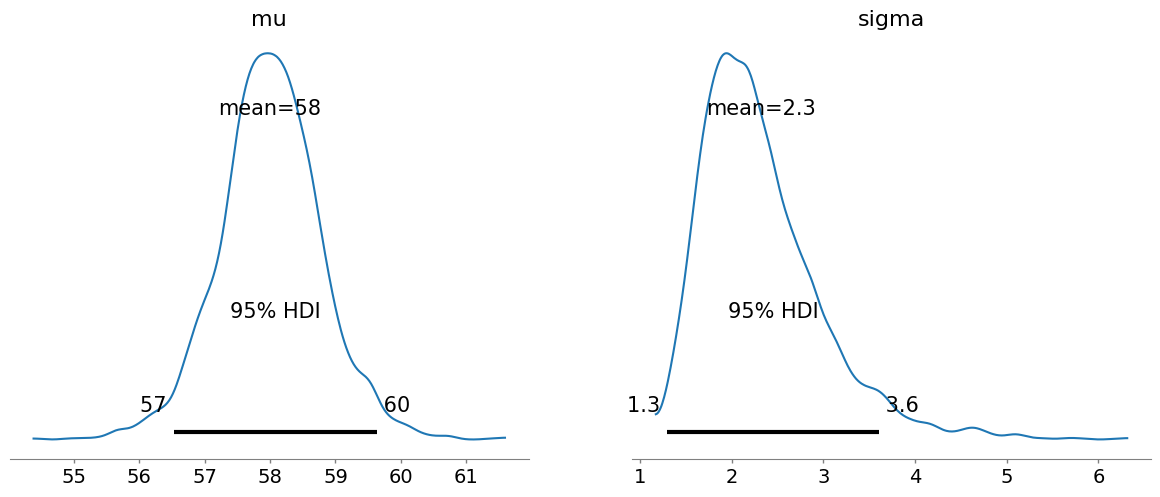

In [ ]:
# Vizualizarea rezultatelor
az.plot_posterior(trace, var_names=["mu", "sigma"], hdi_prob=0.95)
az.summary(trace, var_names=["mu", "sigma"])